<h1>Preprocessing<h1>

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sb
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\loan_data.csv")

In [42]:
df.drop('Loan_ID' , axis = 1 , inplace = True)

In [43]:
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
df["Gender"] = df["Gender"].replace({
    "Male" : 1,
    "Female" : 0
})

In [45]:
df["Married"] = df["Married"].replace({
    "Yes" : 1,
    "No" : 0
})

In [46]:
df["Self_Employed"] = df["Self_Employed"].replace({
    "Yes" : 1,
    "No" : 0
})

In [47]:
df["Education"] = df["Education"].replace({
    "Graduate" : 1,
    "Not Graduate" : 0
})

In [48]:
df["Property_Area"] = df["Property_Area"].replace({
    "Urban" : 0,
    "Rural" : 1,
    "Semiurban" : 2
})

In [49]:
df["Property_Area"].unique()

array([0, 1, 2], dtype=int64)

In [50]:
df["Loan_Status"] = df["Loan_Status"].replace({
    "Y" : 1,
    "N" : 0
})

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [53]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.085306,0.019857
Married,0.369612,1.000000,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.001875,0.089280
Education,-0.049258,-0.014223,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.003592,0.085884
Self_Employed,-0.009829,0.001909,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,0.019688,-0.002303
ApplicantIncome,0.053989,0.051332,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.007894,-0.004710
CoapplicantIncome,0.083946,0.077770,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.028356,-0.059187
LoanAmount,0.106947,0.149519,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,0.014074,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,0.090610,-0.021268
Credit_History,0.016337,0.004381,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.037822,0.561678
Property_Area,-0.085306,0.001875,0.003592,0.019688,-0.007894,-0.028356,0.014074,0.090610,0.037822,1.000000,0.103253


In [54]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [55]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [56]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode().iloc[0])

In [57]:
df = df.dropna(axis=0, subset=['Married'])

In [58]:
df["Dependents"] = df["Dependents"].replace({
    "0" : 0,
    "1" : 1,
    "2" : 2,
    "3+" : 3
})

In [59]:
df = df.dropna(axis=0, subset=['Dependents'])

In [60]:
df = df.dropna(axis=0, subset=['Self_Employed'])

In [61]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [62]:
df['Credit_History'] = df['Credit_History'].fillna(0)

In [63]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             567 non-null    float64
 1   Married            567 non-null    float64
 2   Dependents         567 non-null    float64
 3   Education          567 non-null    int64  
 4   Self_Employed      567 non-null    float64
 5   ApplicantIncome    567 non-null    int64  
 6   CoapplicantIncome  567 non-null    float64
 7   LoanAmount         567 non-null    float64
 8   Loan_Amount_Term   567 non-null    float64
 9   Credit_History     567 non-null    float64
 10  Property_Area      567 non-null    int64  
 11  Loan_Status        567 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.6 KB


In [65]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.361607,0.201488,-0.045588,-0.009925,0.051709,0.158619,0.116226,-0.092342,0.037341,-0.076717,0.024579
Married,0.361607,1.000000,0.356080,-0.005798,-0.005192,0.044495,0.119244,0.160760,-0.115514,-0.014937,-0.001360,0.097169
Dependents,0.201488,0.356080,1.000000,-0.066523,0.057867,0.150880,-0.032217,0.173161,-0.099057,-0.014823,-0.002244,0.010448
Education,-0.045588,-0.005798,-0.066523,1.000000,0.018330,0.143472,0.070687,0.169053,0.095043,0.094416,0.022590,0.085549
Self_Employed,-0.009925,-0.005192,0.057867,0.018330,1.000000,0.143150,-0.016187,0.126595,-0.036978,-0.013138,0.019368,-0.000289
ApplicantIncome,0.051709,0.044495,0.150880,0.143472,0.143150,1.000000,-0.113498,0.558663,-0.008955,-0.003095,0.010816,-0.018224
CoapplicantIncome,0.158619,0.119244,-0.032217,0.070687,-0.016187,-0.113498,1.000000,0.173430,-0.010531,-0.023745,-0.007493,-0.037306
LoanAmount,0.116226,0.160760,0.173161,0.169053,0.126595,0.558663,0.173430,1.000000,0.063145,-0.024779,0.031721,-0.034771
Loan_Amount_Term,-0.092342,-0.115514,-0.099057,0.095043,-0.036978,-0.008955,-0.010531,0.063145,1.000000,0.015740,0.079358,-0.010837
Credit_History,0.037341,-0.014937,-0.014823,0.094416,-0.013138,-0.003095,-0.023745,-0.024779,0.015740,1.000000,0.048553,0.404924


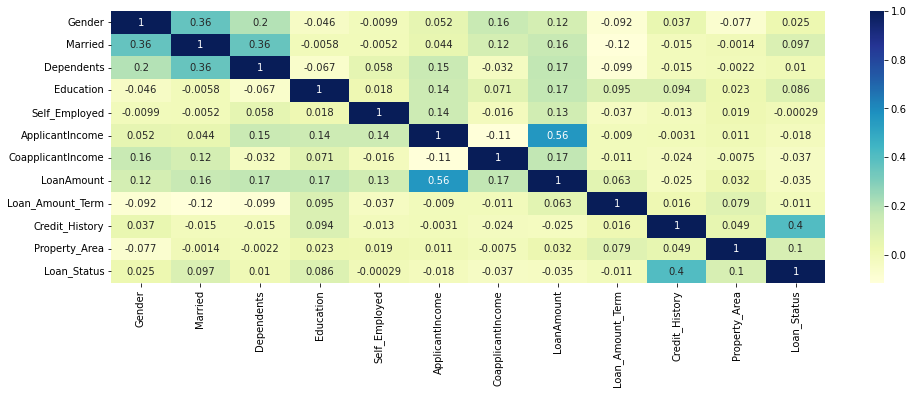

In [66]:
plt.figure(figsize = (16,5))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [67]:
z_score = stats.zscore(df)
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [68]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,0,1


In [69]:
df.drop('Dependents' , axis = 1 , inplace = True)
mms = MinMaxScaler()
new_df = mms.fit_transform(new_df)

In [70]:
new_df = pd.DataFrame(new_df)

In [71]:
tree_df = new_df

In [72]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.000000,1.0,0.0,0.277770,0.000000,0.370383,0.6,1.0,0.0,1.0
1,1.0,1.0,0.333333,1.0,0.0,0.216065,0.167929,0.320755,0.6,1.0,0.5,0.0
2,1.0,1.0,0.000000,1.0,1.0,0.138909,0.000000,0.153639,0.6,1.0,0.0,1.0
3,1.0,1.0,0.000000,0.0,0.0,0.118585,0.262584,0.299191,0.6,1.0,0.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.285129,0.000000,0.355795,0.6,1.0,0.0,1.0


<h1>Logistic Regression<h1>

In [73]:
from sklearn import metrics
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , classification_report , confusion_matrix ,r2_score

In [74]:
y = new_df[11]

In [75]:
x = new_df.drop(11, axis = 1)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70,train_size = 0.8)

In [77]:
print("train size X : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",x_test.shape)
print("test size y : ",y_test.shape)

train size X :  (426, 11)
train size y :  (426,)
test size X :  (107, 11)
test size y :  (107,)


In [78]:
main_model = LogisticRegression()

In [79]:
main_model = LogisticRegression(class_weight={0:0.5,1:0.9} , C = 1.0 , penalty = "l2")
main_model.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.5, 1: 0.9})

In [80]:
y_predict = main_model.predict(x_test)

In [81]:
report = classification_report(y_test,y_predict)
conf_m = confusion_matrix(y_test,y_predict)
squared_error = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [82]:
print("Accuracy : " , metrics.accuracy_score(y_test,y_predict) , end = '\n\n')
print("Confusion_m : " , conf_m ,sep = '\n' , end = '\n\n')
print("Classification Report : " , report , sep ='\n', end = '\n\n')
print("Mean Square Error : " , squared_error , end = '\n\n')

Accuracy :  0.7663551401869159

Confusion_m : 
[[11 21]
 [ 4 71]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.73      0.34      0.47        32
         1.0       0.77      0.95      0.85        75

    accuracy                           0.77       107
   macro avg       0.75      0.65      0.66       107
weighted avg       0.76      0.77      0.74       107


Mean Square Error :  0.2336448598130841



<h1>SVM<h1>

In [83]:
from sklearn.svm import SVC

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=84,train_size = 0.8)

In [85]:
svm_train = SVC()
svm_train.fit(x_train,y_train)

SVC()

In [86]:
y_predict = svm_train.predict(x_test)

In [87]:
report = classification_report(y_test,y_predict)
conf_m = confusion_matrix(y_test,y_predict)
squared_error = mean_squared_error(y_test,y_predict)

In [88]:
print("Accuracy : " , metrics.accuracy_score(y_test,y_predict) , end = '\n\n')
print("Confusion_m : " , conf_m ,sep = '\n' , end = '\n\n')
print("Classification Report : " , report , sep ='\n', end = '\n\n')
print("Mean Square Error : " , squared_error , end = '\n\n')

Accuracy :  0.8411214953271028

Confusion_m : 
[[16 11]
 [ 6 74]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.73      0.59      0.65        27
         1.0       0.87      0.93      0.90        80

    accuracy                           0.84       107
   macro avg       0.80      0.76      0.78       107
weighted avg       0.83      0.84      0.84       107


Mean Square Error :  0.1588785046728972



<h1>Decision Tree<h1>

In [89]:
from sklearn import tree

In [90]:
y = tree_df[11]
x = tree_df[[9,10]]

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=93,train_size = 0.8)

In [92]:
Tree_Train = tree.DecisionTreeClassifier(max_depth = (3))

In [93]:
Tree_Train = Tree_Train.fit(x_train,y_train)
y_predict = Tree_Train.predict(x_test)

In [94]:
report = classification_report(y_test,y_predict)
conf_m = confusion_matrix(y_test,y_predict)
squared_error = mean_squared_error(y_test,y_predict)

In [95]:
print("Accuracy : " , metrics.accuracy_score(y_test,y_predict) , end = '\n\n')
print("Confusion_m : " , conf_m ,sep = '\n' , end = '\n\n')
print("Classification Report : " , report , sep ='\n', end = '\n\n')
print("Mean Square Error : " , squared_error , end = '\n\n')

Accuracy :  0.8411214953271028

Confusion_m : 
[[21 13]
 [ 4 69]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.62      0.71        34
         1.0       0.84      0.95      0.89        73

    accuracy                           0.84       107
   macro avg       0.84      0.78      0.80       107
weighted avg       0.84      0.84      0.83       107


Mean Square Error :  0.1588785046728972



<h1>KNN algorithm Bonus<h1>

In [96]:
y = new_df[11]
x = new_df.drop(11, axis = 1)

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=80,train_size = 0.8)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

In [98]:
report = classification_report(y_test,y_predict)
conf_m = confusion_matrix(y_test,y_predict)
squared_error = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [99]:
print("Accuracy of KNN : " , metrics.accuracy_score(y_test,y_predict) , end = '\n\n')
print("Confusion_m : " , conf_m ,sep = '\n' , end = '\n\n')
print("Classification Report : " , report , sep ='\n', end = '\n\n')
print("Mean Square Error : " , squared_error , end = '\n\n')

Accuracy of KNN :  0.794392523364486

Confusion_m : 
[[19 15]
 [ 7 66]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.73      0.56      0.63        34
         1.0       0.81      0.90      0.86        73

    accuracy                           0.79       107
   macro avg       0.77      0.73      0.75       107
weighted avg       0.79      0.79      0.79       107


Mean Square Error :  0.205607476635514



<h1>Voting algorithm Bonus<h1>

In [100]:
y = new_df[11]
x = new_df.drop(11, axis = 1)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=74,train_size = 0.8)

In [102]:
clf1 = LogisticRegression(random_state=75)
clf2 = SVC(probability=True,random_state=75)
clf3 =  KNeighborsClassifier(n_neighbors=10)
eclf = VotingClassifier(estimators=[('LR', clf1), ('SVM', clf2),('KNN',clf3)],
                        voting='soft', weights=[1,1,2])

In [103]:
eclf.fit(x_train, y_train)
y_predict = eclf.predict(x_test)

In [104]:
report = classification_report(y_test,y_predict)
conf_m = confusion_matrix(y_test,y_predict)
squared_error = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [105]:
print("Accuracy of Voting : " , metrics.accuracy_score(y_test,y_predict) , end = '\n\n')
print("Confusion_m : " , conf_m ,sep = '\n' , end = '\n\n')
print("Classification Report : " , report , sep ='\n', end = '\n\n')
print("Mean Square Error : " , squared_error , end = '\n\n')

Accuracy of Voting :  0.8037383177570093

Confusion_m : 
[[17 11]
 [10 69]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62        28
         1.0       0.86      0.87      0.87        79

    accuracy                           0.80       107
   macro avg       0.75      0.74      0.74       107
weighted avg       0.80      0.80      0.80       107


Mean Square Error :  0.19626168224299065



<h1>SVM BEST RANDOM STATE<h1>

random_states = np.arange(start = 0, stop=101)
scores = []
for state in random_states:
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=state,train_size = 0.8)
    svm_train = SVC()
    svm_train.fit(x_train,y_train)
    y_predict = svm_train.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))
results = pd.DataFrame({'random_state': random_states, 'scores': scores})
results[results["scores"] == results["scores"].max()]

<h1>DECISION TREE BEST RANDOM STATE<h1>

random_states = np.arange(start = 0, stop=101)
scores = []
for state in random_states:
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=state,train_size = 0.8)
    Tree_Train = tree.DecisionTreeClassifier()
    Tree_Train = Tree_Train.fit(x_train,y_train)
    y_predict = Tree_Train.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))
results = pd.DataFrame({'random_state': random_states, 'scores': scores})
results[results["scores"] == results["scores"].max()]